In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-imdb-scores/Netflix TV Shows and Movies.csv


# Data loading and visualization

In this part we will load the data and analyze the contents of the data like how they are arranged,their titles,if null values, duplicaate values etc. are present or not.


In [2]:
df=pd.read_csv('/kaggle/input/netflix-imdb-scores/Netflix TV Shows and Movies.csv')
print(df.head(10))
print('Information')
print(df.info())
print('Null values')
print(df.isnull().sum())
print('Duplicated values')
print(df.duplicated().sum())

   index        id                            title   type  \
0      0   tm84618                      Taxi Driver  MOVIE   
1      1  tm127384  Monty Python and the Holy Grail  MOVIE   
2      2   tm70993                    Life of Brian  MOVIE   
3      3  tm190788                     The Exorcist  MOVIE   
4      4   ts22164     Monty Python's Flying Circus   SHOW   
5      5   tm14873                      Dirty Harry  MOVIE   
6      6  tm185072                     My Fair Lady  MOVIE   
7      7   tm98978                  The Blue Lagoon  MOVIE   
8      8  tm119281                 Bonnie and Clyde  MOVIE   
9      9   tm67378                The Professionals  MOVIE   

                                         description  release_year  \
0  A mentally unstable Vietnam War veteran works ...          1976   
1  King Arthur, accompanied by his squire, recrui...          1975   
2  Brian Cohen is an average young Jewish man, bu...          1979   
3  12-year-old Regan MacNeil begins t

# Dropping the column
We don't need the description column in this analysis so we will drop it.


In [3]:
df=df.drop('description',axis=1)

# Cleaning the dataset
Now we should clean the dataset by removing the nan or null values fom the data, removing the whitespaces and changing the fromat  if necessary.

In [4]:
df.dropna(subset=['age_certification','imdb_votes'],inplace=True)
cols_to_remove_whitespaces=['title','type']
for col in cols_to_remove_whitespaces:
    df[col]=df[col].str.strip()
df['type']=df['type'].str.title()

# Analyzing the data using charts

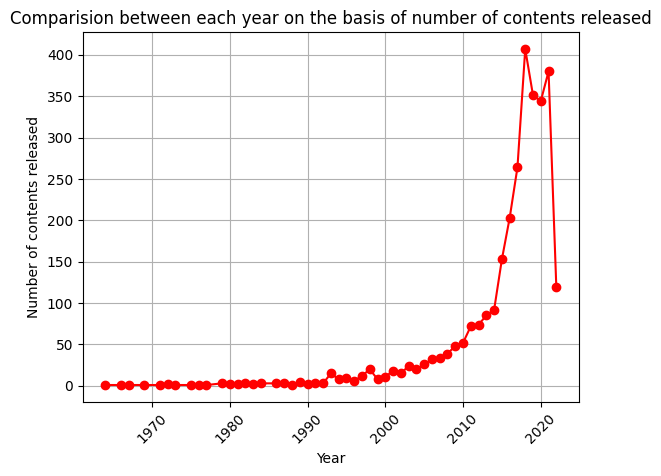

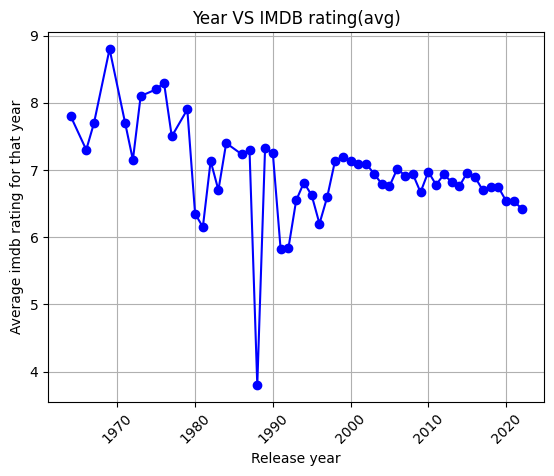

In [5]:
#Number of contents released per year
content_count=df['release_year'].value_counts().sort_index()

plt.plot(content_count.index,content_count.values,color='red',marker='o')
plt.xlabel('Year')
plt.ylabel('Number of contents released')
plt.title('Comparision between each year on the basis of number of contents released')
plt.xticks(rotation=45)
plt.grid()

plt.savefig('year_vs_release.png',dpi=300,bbox_inches='tight')
plt.show()

#yearly mean imdb rating
imdb_avg=df.groupby('release_year')['imdb_score'].mean() #returns a pandas series with index and values 
plt.plot(imdb_avg.index,imdb_avg.values,marker='o',color='blue')
plt.xlabel('Release year')
plt.ylabel('Average imdb rating for that year')
plt.title('Year VS IMDB rating(avg)')
plt.grid()
plt.xticks(rotation=45)
plt.savefig('year_vs_imdb.png',dpi=300,bbox_inches='tight')
plt.show()

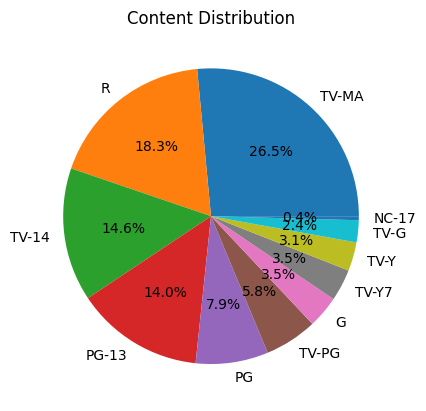

In [6]:
#For which age group most of the contents are released
age_group=df['age_certification'].value_counts()

# plt.figure(figsize=(14,7))

plt.pie(age_group.values,labels=age_group.index,autopct='%1.1f%%')
plt.title('Content Distribution')

plt.savefig('content_distribution.png',dpi=300,bbox_inches='tight')
plt.show()

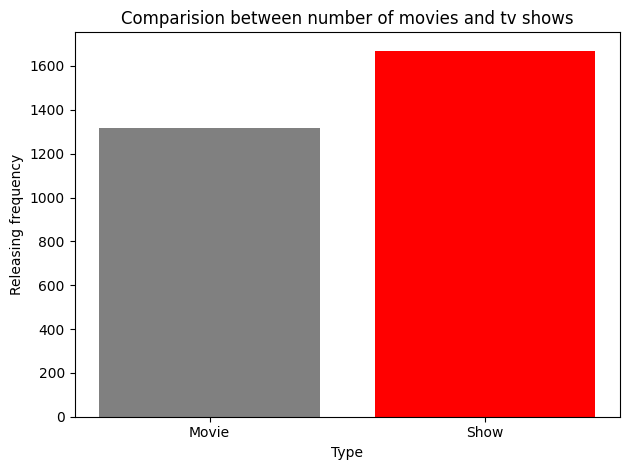

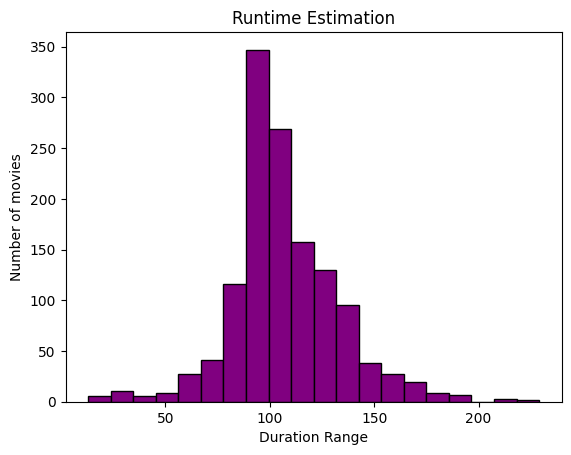

In [7]:
#Movies VS Shows released comparision
types=df['type'].value_counts().sort_index()
# plt.figure(figsize=(12,6))

plt.bar(types.index,types.values,color=['grey','red'])
plt.xlabel('Type')
plt.ylabel('Releasing frequency')
plt.title('Comparision between number of movies and tv shows')

plt.tight_layout()
plt.savefig('movies_vs_tvshows.png',dpi=300,bbox_inches='tight')
plt.show()

#get the runtime of movies
movie_df=df[df['type']=='Movie'].copy()
plt.hist(movie_df['runtime'],bins=20,color='purple',edgecolor='black')
plt.xlabel('Duration Range')
plt.ylabel('Number of movies')
plt.title('Runtime Estimation')

plt.savefig('runtime.png',dpi=300,bbox_inches='tight')
plt.show()

# Conclusion
# What we analyzed

* As Netflix became more popular in 2000s therefore there's an increase in the number of contents release in this platform from then onwards but after   2020 the release has decreased suddenly.
* The IMDB average rating from 2000 onwards have remained between 7.0 to 6.2 .
* However after 2018 the average rating has started decreasing and came so down which was even lower than the average rating from the last 30 years.
* Number of movies releasing per year is more than the number of shows where most of the contents are getting released for mature audience.
* Maximum movies which are released have a runtime between 90 to 110 mins.



# What can be done(Some ideas):

* As the number of releases were very few before 2000s so we can't just say that we are doing exceptionally bad, but decreasing of the rating and content simuntaneously is still an issue and to solve this we can bring the genres and contents which are like early 2000s. When the content was also increasing and the rating was also smooth simuntaneously.
* We can focus on releasing those movies which have their runtime neither too short nor too long. It should be like a movie.
* Most of the adult audience have a busy schedule hence dont't have time to watch a series during working days they prefer movies with an average range of runtime so we should release more movies than shows and that too with good genres which are getting highly rated.

